In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data.shape

(768, 9)

In [18]:
diabetes_true_count = len(data.loc[data['Outcome']==True])
diabetes_false_count = len(data.loc[data['Outcome']==False])


In [19]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [20]:
#train test split
feature_variables = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
prediction_variables = ['Outcome']
X=data[feature_variables].values
y=data[prediction_variables].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [21]:
# Check missing number of rows in each column
print("Number of empty rows in Skin Thickness : {0}".format(len(data.loc[data['SkinThickness']==0])))
print("Number of empty rows in Glucose : {0}".format(len(data.loc[data['Glucose']==0])))
print("Number of empty rows in Insulin : {0}".format(len(data.loc[data['Insulin']==0])))
print("Number of empty rows in BMI : {0}".format(len(data.loc[data['BMI']==0])))
print("Number of empty rows in BloodPressure : {0}".format(len(data.loc[data['BloodPressure']==0])))
print("Number of empty rows in Age : {0}".format(len(data.loc[data['Age']==0])))
print("Number of empty rows in Diabetes Pedigree Function : {0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))

Number of empty rows in Skin Thickness : 227
Number of empty rows in Glucose : 5
Number of empty rows in Insulin : 374
Number of empty rows in BMI : 11
Number of empty rows in BloodPressure : 35
Number of empty rows in Age : 0
Number of empty rows in Diabetes Pedigree Function : 0


In [22]:
#Data Preprocessing
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0,strategy="mean")
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [23]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DTree = DecisionTreeClassifier()
DTree.fit(X_train,y_train.ravel())
predict_DTree = DTree.predict(X_test)
score_DTree = accuracy_score(y_test,predict_DTree)
score_DTree


0.7447916666666666

In [28]:
# conclusion matrix for Decission Tree
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_DTree)
cm

array([[98, 23],
       [26, 45]], dtype=int64)

In [29]:
# Using Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train,y_train.ravel())
predict_NBC = NBC.predict(X_test)
score_NBC = accuracy_score(y_test,predict_NBC)
score_NBC

0.734375

In [26]:
# Using SVM
from sklearn.svm import SVC
SVM = SVC(random_state=0)
SVM.fit(X_train,y_train.ravel())
predict_SVM = SVM.predict(X_test)
score_SVM = accuracy_score(y_test,predict_SVM)
score_SVM

0.7083333333333334

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
KNN= KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
KNN.fit(X_train,y_train.ravel())
predict_KNN = KNN.predict(X_test)
score_KNN = accuracy_score(y_test,predict_KNN)
score_KNN

0.7291666666666666

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train.ravel())
predict_LogReg = LogReg.predict(X_test)
score_LogReg = accuracy_score(y_test,predict_LogReg)
score_LogReg


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7552083333333334

In [30]:
Classifier_accuracy = [score_DTree*100,score_NBC*100,score_SVM*100,score_KNN*100,score_LogReg*100]
Classifier_accuracy

[74.47916666666666,
 73.4375,
 70.83333333333334,
 72.91666666666666,
 75.52083333333334]

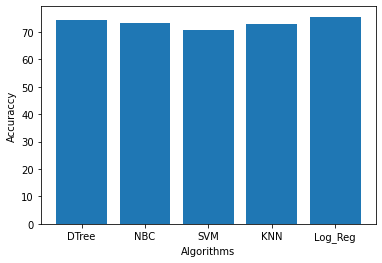

In [36]:
Y=Classifier_accuracy
X = ['DTree','NBC','SVM','KNN','Log_Reg']
plt.ylabel('Accuraccy')
plt.xlabel('Algorithms')
plt.bar(X,Y)
plt.show()


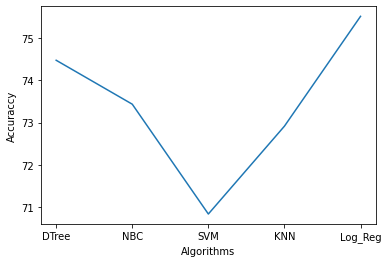

In [39]:
plt.ylabel('Accuraccy')
plt.xlabel('Algorithms')
plt.plot(X,Y)
plt.show()


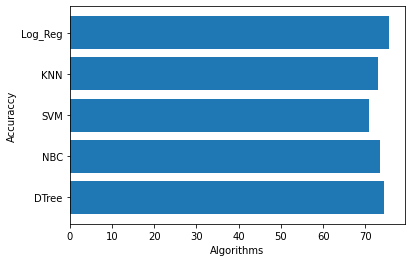

In [40]:
plt.ylabel('Accuraccy')
plt.xlabel('Algorithms')
plt.barh(X,Y)
plt.show()